<a href="https://colab.research.google.com/github/reygen-win/Deep-Learning-Journey/blob/main/1_Linear%20Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><font size="5"><b>Linear Regression with PyTorch</b></font></h1>

# **1. Import Library**

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

device = "cuda" if torch.cuda.is_available() else "cpu"

# **2. Create Dataset**

y = 3x + 2 + noise; x = [0, 100]

In [3]:
start = 0
end = 100
step = 1

X = torch.arange(start, end, step).type(torch.float).unsqueeze(dim=1)
y = 3*X + 2 + torch.randn(X.size())

X[:5], y[:5]

(tensor([[0.],
         [1.],
         [2.],
         [3.],
         [4.]]),
 tensor([[ 1.7731],
         [ 5.8837],
         [ 8.3130],
         [11.0393],
         [12.8360]]))

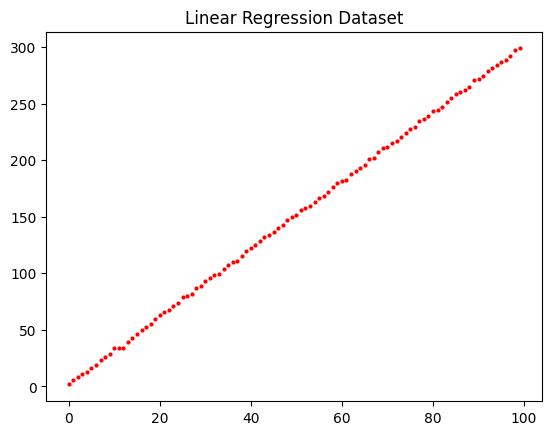

In [4]:
# Plot the dataset
plt.scatter(X, y, c='r', s=4)
plt.title("Linear Regression Dataset")
plt.show()

# **3. Train Test Split**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]))

In [6]:
# Plot the prediction
def plot_prediction(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, train_predictions=None, test_predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(X_train, y_train, c='b', s=4, label='Training Data')
    plt.scatter(X_test, y_test, c='g', s=4, label='Test Data')

    if train_predictions is not None:
        plt.scatter(X_train, train_predictions, c='orange', s=4, label='Train Predictions')

    if test_predictions is not None:
        plt.scatter(X_test, test_predictions, c='r', s=4, label='Test Predictions')

    plt.legend()
    plt.show()

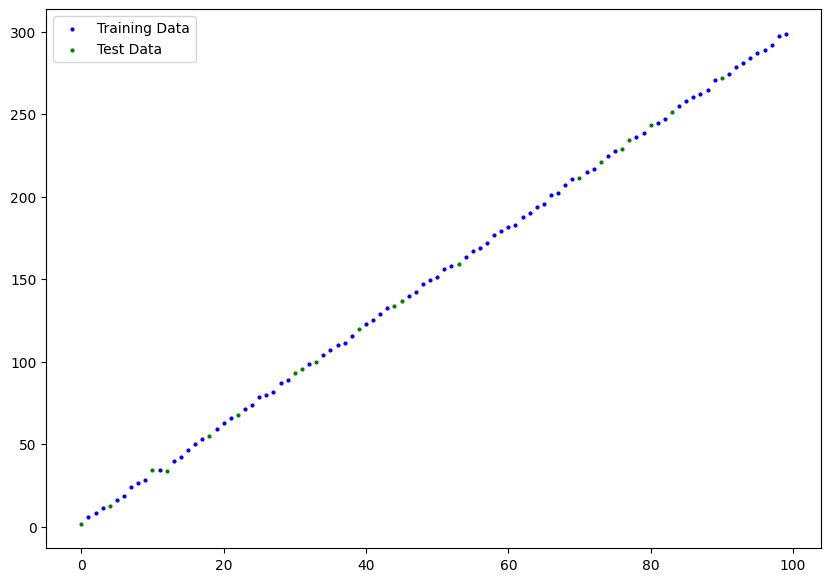

In [7]:
plot_prediction()

# **4. Create linear regression model**

In [8]:
class LinearRegressionV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x):
        return self.weight * x + self.bias

In [9]:
lr_model = LinearRegressionV0().to(device)
lr_model

LinearRegressionV0()

# **5. Define Loss Function and Optimizer**

In [10]:
loss_fn = nn.L1Loss()
optimizer = optim.SGD(lr_model.parameters(), lr=0.001)

# **6. Training Loop**

In [1]:
# Define Training Loop
def training_loop(X_train, y_train, X_test, y_test, model, loss_fn, optimizer, epochs):
    # Training loop
    for epoch in range(epochs):
        # Training Mode
        model.train()

        # 1. Forward pass
        y_pred = model(X_train)

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y_train)

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backwards
        loss.backward()

        # 5. Optimizer step
        optimizer.step()


        # Test Mode
        model.eval()
        # 1. Evaluate the model
        with torch.inference_mode():
            test_pred = model(X_test)
            test_loss = loss_fn(test_pred, y_test)

        # 2. Print what's happening
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Training Loss: {loss} | Test Loss: {test_loss}")

In [11]:
# Send dataset to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [12]:
# Train the lr_model
training_loop(X_train, y_train, X_test, y_test, lr_model, loss_fn, optimizer, epochs=201)

Epoch: 0 | Training Loss: 203.86087036132812 | Test Loss: 176.59268188476562
Epoch: 10 | Training Loss: 178.09523010253906 | Test Loss: 153.99893188476562
Epoch: 20 | Training Loss: 152.32960510253906 | Test Loss: 131.40518188476562
Epoch: 30 | Training Loss: 126.56396484375 | Test Loss: 108.8114242553711
Epoch: 40 | Training Loss: 100.79833984375 | Test Loss: 86.21766662597656
Epoch: 50 | Training Loss: 75.03270721435547 | Test Loss: 63.62390899658203
Epoch: 60 | Training Loss: 49.26708221435547 | Test Loss: 41.030155181884766
Epoch: 70 | Training Loss: 23.501440048217773 | Test Loss: 18.436397552490234
Epoch: 80 | Training Loss: 1.052652359008789 | Test Loss: 1.1621874570846558
Epoch: 90 | Training Loss: 1.051430344581604 | Test Loss: 1.1517231464385986
Epoch: 100 | Training Loss: 1.0525383949279785 | Test Loss: 1.158799171447754
Epoch: 110 | Training Loss: 1.053694725036621 | Test Loss: 1.1555299758911133
Epoch: 120 | Training Loss: 1.048423171043396 | Test Loss: 1.1517043113708496


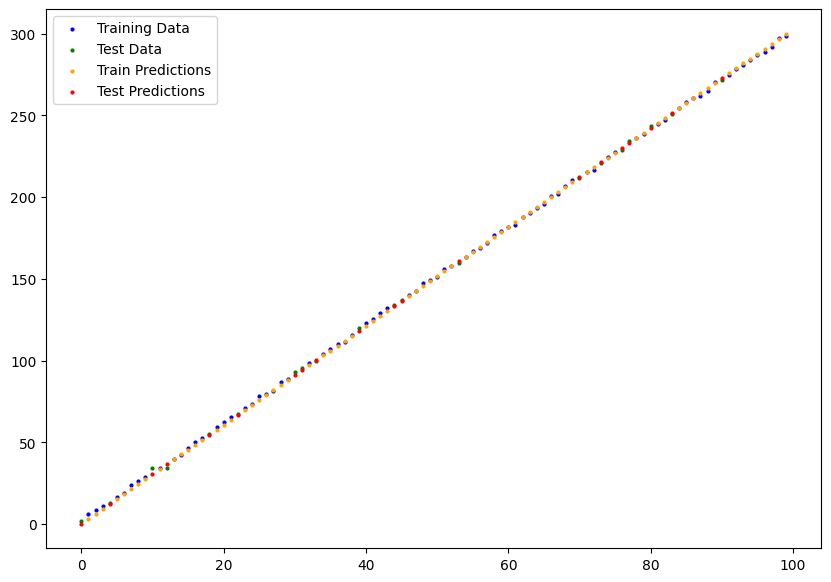

In [13]:
with torch.inference_mode():
    y_train_pred = lr_model(X_train)
    y_test_pred = lr_model(X_test)

plot_prediction(X_train=X_train.cpu(),
                y_train=y_train.cpu(),
                X_test=X_test.cpu(),
                y_test=y_test.cpu(),
                train_predictions=y_train_pred.cpu(),
                test_predictions=y_test_pred.cpu())

# **7. Experiment with the Model**

In [196]:
class LinearRegressionV1(nn.Module):
    def __init__(self, input_features, hidden_units, output_features):
        super().__init__()
        self.layer_1 = nn.Linear(input_features, hidden_units)
        self.layer_2 = nn.Linear(hidden_units, hidden_units)
        self.layer_3 = nn.Linear(hidden_units, output_features)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

In [216]:
lr_model_1 = LinearRegressionV1(1, 2, 1).to(device)
lr_model_1

LinearRegressionV1(
  (layer_1): Linear(in_features=1, out_features=2, bias=True)
  (layer_2): Linear(in_features=2, out_features=2, bias=True)
  (layer_3): Linear(in_features=2, out_features=1, bias=True)
)

In [217]:
# Define optimizer and loss function
loss_fn_1 = nn.L1Loss()
optimizer_1 = optim.SGD(lr_model_1.parameters(), lr=0.001)

In [218]:
# Training loop
training_loop(X_train, y_train, X_test, y_test, lr_model_1, loss_fn_1, optimizer_1, epochs=1001)

Epoch: 0 | Training Loss: 154.06346130371094 | Test Loss: 134.84262084960938
Epoch: 10 | Training Loss: 151.60861206054688 | Test Loss: 132.6833953857422
Epoch: 20 | Training Loss: 148.093994140625 | Test Loss: 129.38731384277344
Epoch: 30 | Training Loss: 139.35763549804688 | Test Loss: 120.8240966796875
Epoch: 40 | Training Loss: 105.4300765991211 | Test Loss: 85.73866271972656
Epoch: 50 | Training Loss: 25.06633949279785 | Test Loss: 4.217016220092773
Epoch: 60 | Training Loss: 25.50802993774414 | Test Loss: 3.771395444869995
Epoch: 70 | Training Loss: 25.352800369262695 | Test Loss: 3.908799648284912
Epoch: 80 | Training Loss: 25.786239624023438 | Test Loss: 3.4901671409606934
Epoch: 90 | Training Loss: 25.267642974853516 | Test Loss: 3.9659361839294434
Epoch: 100 | Training Loss: 25.617168426513672 | Test Loss: 3.6164391040802
Epoch: 110 | Training Loss: 25.21310806274414 | Test Loss: 3.9955062866210938
Epoch: 120 | Training Loss: 25.52249526977539 | Test Loss: 3.682767391204834
E

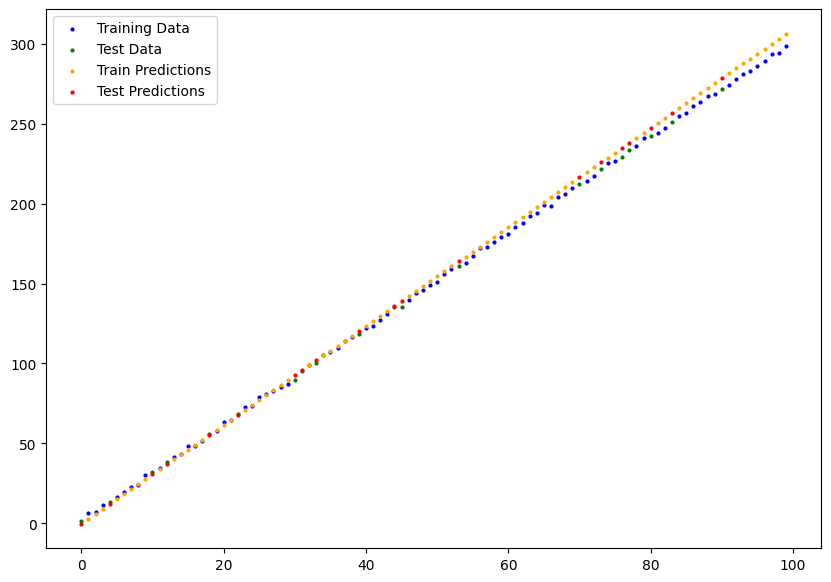

In [219]:
# Plot prediction
lr_model_1.eval()
with torch.inference_mode():
    y_train_pred_1 = lr_model_1(X_train)
    y_test_pred_1 = lr_model_1(X_test)

plot_prediction(X_train=X_train.cpu(),
                y_train=y_train.cpu(),
                X_test=X_test.cpu(),
                y_test=y_test.cpu(),
                train_predictions=y_train_pred_1.cpu(),
                test_predictions=y_test_pred_1.cpu())

# Key Lesson:
1. A simple model is often best for simple data. This is just like learning: mastering the fundamentals is more effective than getting overwhelmed by complex things without a strong foundation.
2. If the loss oscillates irregularly, it might be because the learning rate too high. This is just like our learning path: It's better not to rush. If we focus on one topic in a period of time, then we will master it more deeply.